In [1]:
import os
from pathlib import Path

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from scipy import stats
from tbparse import SummaryReader

In [2]:
log_dir = str(os.path.abspath(os.path.join(str(Path.home()), 'forl-exp/gathering')))
reader = SummaryReader(log_dir, extra_columns={'dir_name'})
df = reader.scalars

In [3]:
df['tag'].unique().tolist()

['ray/tune/agent_timesteps_total',
 'ray/tune/connector_metrics/ObsPreprocessorConnector_ms',
 'ray/tune/connector_metrics/StateBufferConnector_ms',
 'ray/tune/connector_metrics/ViewRequirementAgentConnector_ms',
 'ray/tune/counters/num_agent_steps_sampled',
 'ray/tune/counters/num_agent_steps_trained',
 'ray/tune/counters/num_env_steps_sampled',
 'ray/tune/counters/num_env_steps_trained',
 'ray/tune/done',
 'ray/tune/episode_len_mean',
 'ray/tune/episode_reward_max',
 'ray/tune/episode_reward_mean',
 'ray/tune/episode_reward_min',
 'ray/tune/episodes_this_iter',
 'ray/tune/episodes_total',
 'ray/tune/info/learner/blue_p/diff_num_grad_updates_vs_sampler_policy',
 'ray/tune/info/learner/blue_p/learner_stats/amd_loss',
 'ray/tune/info/learner/blue_p/learner_stats/cooperativeness',
 'ray/tune/info/learner/blue_p/learner_stats/cur_kl_coeff',
 'ray/tune/info/learner/blue_p/learner_stats/cur_lr',
 'ray/tune/info/learner/blue_p/learner_stats/entropy',
 'ray/tune/info/learner/blue_p/learner_st

In [4]:
df['dir_name'].unique().tolist()

['amd-cum-r-delay_model-lstm_assump-softmax/AMDPPO_gathering_4c3f5_00000_0_2023-06-11_21-00-59',
 'amd-cum-r-immediate_model-lstm_assump-softmax/AMDPPO_gathering_326e4_00000_0_2023-06-12_10-22-01',
 'amd-qadj-delay_model-conv_assump-neural/AMDPPO_gathering_0875d_00000_0_2023-06-12_16-47-22',
 'amd-qadj-delay_model-conv_assump-softmax/AMDPPO_gathering_f5b20_00000_0_2023-06-12_16-18-12',
 'amd-qadj-delay_model-lstm_assump-neural/AMDPPO_gathering_e1626_00000_0_2023-06-12_10-34-02',
 'amd-qadj-delay_model-lstm_assump-softmax/AMDPPO_gathering_159d8_00000_0_2023-06-12_10-35-30',
 'no-amd_model-conv/AMDPPO_gathering_dfdb6_00000_0_2023-06-12_10-34-00',
 'no-amd_model-lstm/AMDPPO_gathering_02ce4_00000_0_2023-06-12_15-35-37']

In [5]:
trial_dict = {
    'amd-cum-r-delay_model-lstm_assump-softmax/AMDPPO_gathering_4c3f5_00000_0_2023-06-11_21-00-59': 'AMD + LSTM + softmax + R + delay',
    'amd-cum-r-immediate_model-lstm_assump-softmax/AMDPPO_gathering_326e4_00000_0_2023-06-12_10-22-01': 'AMD + LSTM + softmax + R',
    'amd-qadj-delay_model-conv_assump-neural/AMDPPO_gathering_0875d_00000_0_2023-06-12_16-47-22': 'AMD + Conv + neural + Q + delay',
    'amd-qadj-delay_model-conv_assump-softmax/AMDPPO_gathering_f5b20_00000_0_2023-06-12_16-18-12': 'AMD + Conv + softmax + Q + delay',
    'amd-qadj-delay_model-lstm_assump-neural/AMDPPO_gathering_e1626_00000_0_2023-06-12_10-34-02': 'AMD + LSTM + neural + Q + delay',
    'amd-qadj-delay_model-lstm_assump-softmax/AMDPPO_gathering_159d8_00000_0_2023-06-12_10-35-30': "AMD + LSTM + softmax + Q + delay",
    'no-amd_model-conv/AMDPPO_gathering_dfdb6_00000_0_2023-06-12_10-34-00': 'PPO + Conv',
    'no-amd_model-lstm/AMDPPO_gathering_02ce4_00000_0_2023-06-12_15-35-37': 'PPO + LSTM',
}
df['trials'] = df['dir_name'].apply(trial_dict.get)

In [6]:
list(trial_dict.values())

['AMD + LSTM + softmax + R + delay',
 'AMD + LSTM + softmax + R',
 'AMD + Conv + neural + Q + delay',
 'AMD + Conv + softmax + Q + delay',
 'AMD + LSTM + neural + Q + delay',
 'AMD + LSTM + softmax + Q + delay',
 'PPO + Conv',
 'PPO + LSTM']

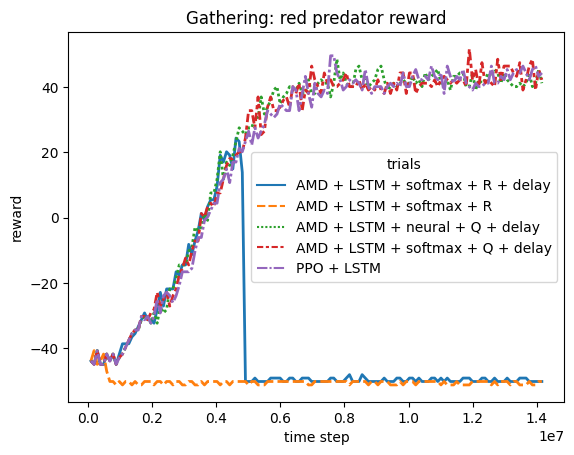

In [15]:
new_df = df[df['tag'] == 'ray/tune/policy_reward_max/red_p']
new_df = new_df[new_df['trials'].isin([
    'AMD + LSTM + softmax + R + delay',
    'AMD + LSTM + softmax + R',
    # 'AMD + Conv + neural + Q + delay',
    # 'AMD + Conv + softmax + Q + delay',
    'AMD + LSTM + neural + Q + delay',
    'AMD + LSTM + softmax + Q + delay',
    # 'PPO + Conv',
    'PPO + LSTM',
])]
# new_df['value'] = new_df['value'].ewm(com=0.1).mean()
g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    legend='full',
    style='trials',
    linewidth=2,
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='reward', title='Gathering: red predator reward')
plt.savefig('./gathering_red_reward.pdf')

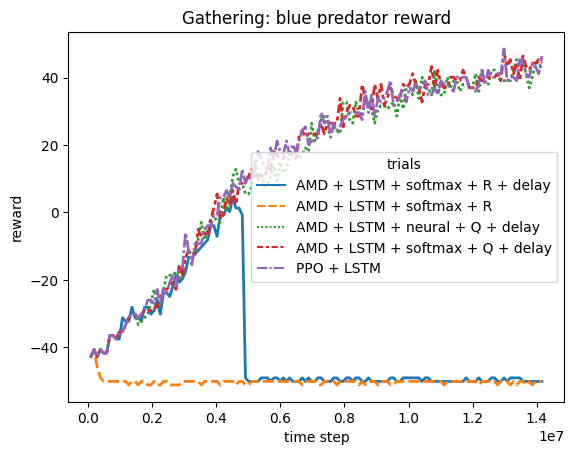

In [16]:
new_df = df[df['tag'] == 'ray/tune/policy_reward_max/blue_p']
new_df = new_df[new_df['trials'].isin([
    'AMD + LSTM + softmax + R + delay',
    'AMD + LSTM + softmax + R',
    # 'AMD + Conv + neural + Q + delay',
    # 'AMD + Conv + softmax + Q + delay',
    'AMD + LSTM + neural + Q + delay',
    'AMD + LSTM + softmax + Q + delay',
    # 'PPO + Conv',
    'PPO + LSTM',
])]
# new_df['value'] = new_df['value'].ewm(com=0.1).mean()
g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    legend='full',
    style='trials',
    linewidth=2,
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='reward', title='Gathering: blue predator reward')
plt.savefig('./gathering_blue_reward.pdf')

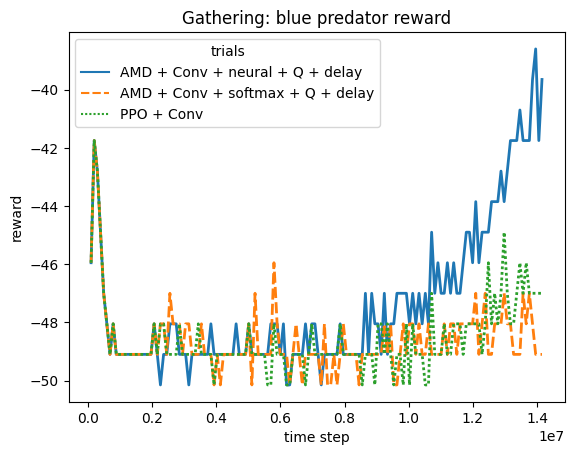

In [33]:
new_df = df[df['tag'] == 'ray/tune/policy_reward_max/blue_p']
new_df = new_df[new_df['trials'].isin([
    # 'AMD + LSTM + softmax + R + delay',
    # 'AMD + LSTM + softmax + R',
    'AMD + Conv + neural + Q + delay',
    'AMD + Conv + softmax + Q + delay',
    # 'AMD + LSTM + neural + Q + delay',
    # 'AMD + LSTM + softmax + Q + delay',
    'PPO + Conv',
    # 'PPO + LSTM',
])]
# new_df['value'] = new_df['value'].ewm(com=0.1).mean()
g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    legend='full',
    style='trials',
    linewidth=2,
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='reward', title='Gathering: blue predator reward')
plt.savefig('./gathering_conv_blue_reward.pdf')

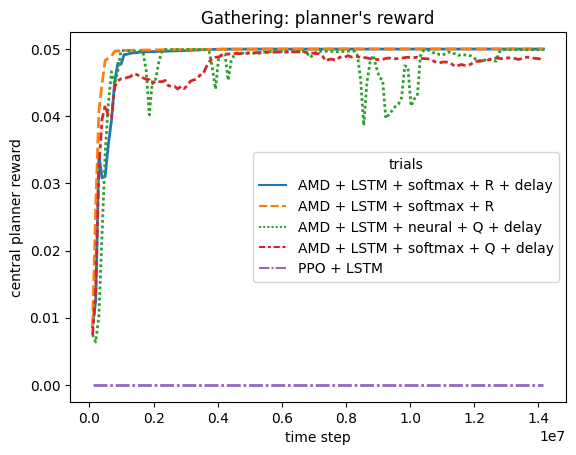

In [34]:
# ray/tune/info/learner/central_planner/learner_stats/planner_reward_cost
new_df = df[df['tag'] == 'ray/tune/info/learner/central_planner/learner_stats/planner_reward_cost']
new_df = new_df[new_df['trials'].isin([
    'AMD + LSTM + softmax + R + delay',
    'AMD + LSTM + softmax + R',
    # 'AMD + Conv + neural + Q + delay',
    # 'AMD + Conv + softmax + Q + delay',
    'AMD + LSTM + neural + Q + delay',
    'AMD + LSTM + softmax + Q + delay',
    # 'PPO + Conv',
    # 'PPO + Conv (2nd)'
    'PPO + LSTM',
    # 'PPO + LSTM (2nd)'
])]
# new_df['value'] = new_df['value'].ewm(com=3).mean()
g = sns.lineplot(
    data=new_df,
    x='step',
    y='value',
    hue='trials',
    legend='full',
    style='trials',
    linewidth=2,
    dashes=True,
    markers=False,
    seed=1234,
)
g.set(xlabel='time step', ylabel='central planner reward', title="Gathering: planner's reward")
plt.savefig('./gathering_cp_reward.pdf')

## Env screenshot  

In [19]:
# add module
import os
import sys

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path)

import numpy as np
from gymnasium.utils import seeding
from PIL import Image

from core.environments.gathering.env import Gathering

rng, _ = seeding.np_random(114514)
env = Gathering(rng, )
env.render_mode = 'rgb_array'

In [ ]:
env.reset()

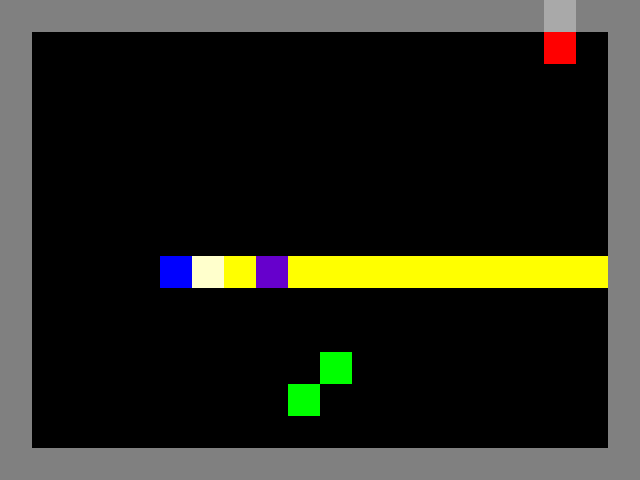

In [31]:
env.step({
    'blue_p': 7,
    'red_p': 4,
})
img = Image.fromarray(env.render())
display(img)

In [32]:
img.save('./gathering_env.png', 'PNG')